In [1]:
# Install the efficientnet library using pip
# The -U flag is used to upgrade the package if it's already installed
!pip install -U efficientnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.9 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import pickle                       # For serializing and deserializing Python objects
import pandas as pd                 # For data manipulation and analysis
import numpy as np                  # For numerical operations
import matplotlib.pyplot as plt     # For data visualization
from pylab import rcParams          # Control the default size of the plot
import os                           # For interacting with the operating system
import tarfile                      # For working with tar files
import cv2                          # OpenCV for image processing
import albumentations as albu       # Advanced data augmentation
import seaborn as sns               # For data visualization

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
import tensorflow.keras as keras              # High-level neural networks API
import tensorflow as tf                       # Deep learning framework
from tensorflow.keras import regularizers     # Regularization techniques
from tensorflow.keras.initializers import RandomNormal, Constant                    # Import necessary initializers
from tensorflow.keras.layers import Lambda, Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense      # Import Lambda
from tensorflow.keras.models import Sequential, Model, load_model                   # Import Sequential, Model, and load_model
from tensorflow.keras import optimizers                                             # Import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator                 # Import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau             # Import EarlyStopping and ReduceLROnPlateau

In [4]:
# Import the EfficientNet library from the efficientnet package
import efficientnet.keras as efn
from tensorflow.keras.applications import EfficientNetB0  # Pre-trained EfficientNet model

In [5]:
from keras.models import Sequential, Model, load_model            # For creating neural networks
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization, Activation, Input, concatenate, AveragePooling2D  # Layers
from keras.optimizers import Adam                                 # Optimization algorithm
from keras.callbacks import EarlyStopping, ReduceLROnPlateau      # Callbacks to adjust training
from keras.utils import to_categorical                            # Convert labels to categorical format

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report   # Evaluation metrics
from sklearn.model_selection import StratifiedShuffleSplit                            # Stratified train/val split
from sklearn.model_selection import train_test_split                                  # train test split

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Define the path to the CIFAR-100 tar.gz file and the extraction directory
tar_file_path = '/content/drive/MyDrive/Msc_Project/cifar-100-python.tar.gz'
extract_dir = '/content/drive/MyDrive/Msc_Project/cifar-100-python'

# Extract the tar.gz file into the specified directory
print("Extracting CIFAR-100 tar.gz file...")
with tarfile.open(tar_file_path, 'r:gz') as tar:
    tar.extractall(path=extract_dir)
print("Extraction completed.")

Extracting CIFAR-100 tar.gz file...
Extraction completed.


In [9]:
# Open the tar.gz file to list its contents without extracting them
print("\nListing contents of the tar.gz file...")
with tarfile.open(tar_file_path, 'r:gz') as tar:
    tar.list()          # List the contents of the tarball

# Define the path to the extracted CIFAR-100 directory
extracted_dir = os.path.join(extract_dir, 'cifar-100-python')


Listing contents of the tar.gz file...
?rwxr-xr-x spoon/spoon          0 2010-02-20 00:16:29 cifar-100-python/ 
?rw-r--r-- spoon/spoon          0 2010-02-19 09:15:20 cifar-100-python/file.txt~ 
?rw-r--r-- spoon/spoon  155249918 2010-02-18 20:50:02 cifar-100-python/train 
?rw-r--r-- spoon/spoon   31049707 2010-02-18 20:50:06 cifar-100-python/test 
?rw-r--r-- spoon/spoon       1473 2010-02-20 00:14:22 cifar-100-python/meta 


In [10]:
# Define file paths for the train, test, and meta files in the extracted directory
train_file = os.path.join(extracted_dir, 'train')
test_file = os.path.join(extracted_dir, 'test')
meta_file = os.path.join(extracted_dir, 'meta')

In [11]:
# Check if the train, test, and meta files exist in the extracted directory
print("\nFile existence verification:")
print("Train file exists:", os.path.isfile(train_file))
print("Test file exists:", os.path.isfile(test_file))
print("Meta file exists:", os.path.isfile(meta_file))


File existence verification:
Train file exists: True
Test file exists: True
Meta file exists: True


In [12]:
# Function to unpickle the dataset files
def unpickle(file):
    with open(file, 'rb') as fo:
        myDict = pickle.load(fo, encoding='latin1')
    return myDict

In [13]:
# Define the file paths for train, test, and meta files
train_file = os.path.join(extracted_dir, 'train')
test_file = os.path.join(extracted_dir, 'test')
meta_file = os.path.join(extracted_dir, 'meta')

In [14]:
# Load the CIFAR-100 dataset
trainData = unpickle(train_file)
testData = unpickle(test_file)
metaData = unpickle(meta_file)

In [15]:
# Check the type of items in the trainData file
print("Data type of items in trainData:")
for item in trainData:
    print(f"{item}: {type(trainData[item])}")

# Print some basic information about the train dataset
print("\nNumber of data samples in trainData:", len(trainData['data']))
print("Length of a single data sample (flattened):", len(trainData['data'][0]))

Data type of items in trainData:
filenames: <class 'list'>
batch_label: <class 'str'>
fine_labels: <class 'list'>
coarse_labels: <class 'list'>
data: <class 'numpy.ndarray'>

Number of data samples in trainData: 50000
Length of a single data sample (flattened): 3072


In [16]:
# Display unique fine and coarse labels
print("\nUnique fine labels:", np.unique(trainData['fine_labels']))
print("Unique coarse labels:", np.unique(trainData['coarse_labels']))


Unique fine labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Unique coarse labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [17]:
# Print the batch label
print("\nBatch label:", trainData['batch_label'])


Batch label: training batch 1 of 1


In [18]:
# Number of filenames in the dataset
print("Number of filenames:", len(trainData['filenames']))

Number of filenames: 50000


In [19]:
# Create DataFrames for coarse and fine labels using metaData
category = pd.DataFrame(metaData['coarse_label_names'], columns=['SuperClass'])  # Coarse categories
subCategory = pd.DataFrame(metaData['fine_label_names'], columns=['SubClass'])  # Fine categories
print("\nSuperClass and SubClass categories loaded into DataFrames.")


SuperClass and SubClass categories loaded into DataFrames.



Image number selected: 47854
Shape of image: (32, 32, 3)


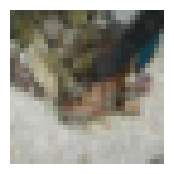

In [20]:
# Prepare training data
X_train = trainData['data']

# Reshape the training data into a 4D array for CNN input
# Reshaping to (num_samples, 32, 32, 3) which corresponds to (height, width, channels)
X_train = X_train.reshape(len(X_train), 3, 32, 32).transpose(0, 2, 3, 1)

# Display a random image from the dataset along with its labels
rcParams['figure.figsize'] = 2, 2  # Set figure size for plotting

imageId = np.random.randint(0, len(X_train))  # Generate a random index
plt.imshow(X_train[imageId])  # Display the image
plt.axis('off')  # Remove axis for better visualization

# Print image details: shape, category, subcategory
print(f"\nImage number selected: {imageId}")
print(f"Shape of image: {X_train[imageId].shape}")

In [21]:
print(f"Image category number: {trainData['coarse_labels'][imageId]}")
print(f"Image category name: {category.iloc[trainData['coarse_labels'][imageId]][0].capitalize()}")

Image category number: 8
Image category name: Large_carnivores


<ipython-input-21-8e9d4aa8c980>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Image category name: {category.iloc[trainData['coarse_labels'][imageId]][0].capitalize()}")


In [22]:
print(f"Image subcategory number: {trainData['fine_labels'][imageId]}")
print(f"Image subcategory name: {subCategory.iloc[trainData['fine_labels'][imageId]][0].capitalize()}")

Image subcategory number: 88
Image subcategory name: Tiger


<ipython-input-22-89f3e243ba48>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Image subcategory name: {subCategory.iloc[trainData['fine_labels'][imageId]][0].capitalize()}")


<ipython-input-23-1d76041563e8>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i, j].set_title(subCategory.iloc[trainData['fine_labels'][imageId[k]]][0].capitalize())


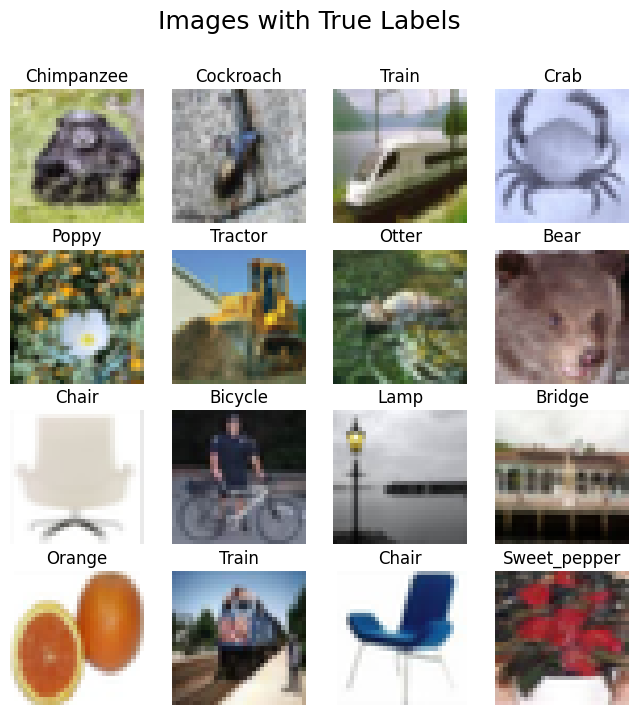

In [23]:
# Display 16 random images with their labels
rcParams['figure.figsize'] = 8, 8               # Set larger figure size for displaying multiple images

num_row = 4  # Number of rows of images
num_col = 4  # Number of columns of images
imageId = np.random.randint(0, len(X_train), num_row * num_col)  # Get 16 random image indices

# Create a figure to display the images
fig, axes = plt.subplots(num_row, num_col)
plt.suptitle('Images with True Labels', fontsize=18)  # Add a title to the plot

# Loop through the grid and display each image with its true subcategory label
for i in range(num_row):
    for j in range(num_col):
        k = (i * num_col) + j  # Calculate the index for the image
        axes[i, j].imshow(X_train[imageId[k]])  # Display the image
        # Set the title to the corresponding subcategory label
        axes[i, j].set_title(subCategory.iloc[trainData['fine_labels'][imageId[k]]][0].capitalize())
        axes[i, j].axis('off')  # Remove the axes for clean visualization

In [24]:
# Transform the test dataset
X_test = testData['data']

# Reshape the test dataset to 4D array (num_samples, 32, 32, 3)
X_test = X_test.reshape(len(X_test), 3, 32, 32).transpose(0, 2, 3, 1)
print("X_test shape:", X_test.shape)

# Prepare labels for training and testing
y_train = trainData['fine_labels']
y_test = testData['fine_labels']

X_test shape: (10000, 32, 32, 3)


In [25]:
# Convert labels to categorical (one-hot encoded) format
n_classes = 100
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

# Use StratifiedShuffleSplit to split the training set into train and validation subsets
# This ensures that the class proportions remain the same in both sets
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.4, random_state=123)

for train_index, val_index in sss.split(X_train, y_train):
    X_train_data, X_val_data = X_train[train_index], X_train[val_index]
    y_train_data, y_val_data = y_train[train_index], y_train[val_index]

print("Number of training samples:", X_train_data.shape[0])
print("Number of validation samples:", X_val_data.shape[0])

Number of training samples: 30000
Number of validation samples: 20000


In [26]:
# Function to resize images to the target dimensions using OpenCV
def resize_img(img, shape):
    return cv2.resize(img, (shape[1], shape[0]), interpolation=cv2.INTER_CUBIC)

In [27]:
# Define ReduceLROnPlateau callbacks
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience=5, factor=0.5, min_lr=1e-6, verbose=1)

In [28]:
####################################################################### Model 1 - CNN #########################################################################

In [29]:
# Define a Sequential CNN model
cnn_model = Sequential()

# 1st block: 2 Convolutional layers + MaxPooling + Dropout
cnn_model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.001)))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(256, (3, 3), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.3))

# 2nd block: 2 Convolutional layers + MaxPooling + Dropout
cnn_model.add(Conv2D(512, (3, 3), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(512, (3, 3), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.3))

# 3rd block: 2 Convolutional layers + MaxPooling + Dropout
cnn_model.add(Conv2D(512, (3, 3), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(512, (3, 3), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.3))

# 4th block: 2 Convolutional layers + MaxPooling + Dropout
cnn_model.add(Conv2D(512, (3, 3), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(Conv2D(512, (3, 3), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.3))

# Flatten the feature map before entering the dense layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(1024, kernel_regularizer=regularizers.l2(0.001)))          # Dense layer with 1024 units
cnn_model.add(Activation('relu'))   # ReLU activation
cnn_model.add(Dropout(0.3))         # Dropout for regularization

# Batch Normalization for Dense layer
cnn_model.add(BatchNormalization(momentum=0.95, epsilon=0.005,
                             beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
                             gamma_initializer=Constant(value=0.9)))

# Output layer for 100 classes (using softmax for multi-class classification)
cnn_model.add(Dense(100, activation='softmax'))

# Print model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 512)           │              

 Total params: 15,795,556 (60.26 MB)

 Trainable params: 15,786,340 (60.22 MB)

 Non-trainable params: 9,216 (36.00 KB)

In [30]:
# Data Augmentation to increase the diversity of training data
train_datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotation up to 20 degrees
    horizontal_flip=True  # Random horizontal flips
)
# Split data into training and validation sets
X_train_data, X_val_data, y_train_data, y_val_data = train_test_split(X_train, y_train, test_size=0.4, random_state=93)

# Fit the ImageDataGenerator to training data
train_datagen.fit(X_train_data)

In [31]:
# Compile the model with Adam optimizer and categorical cross-entropy loss
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [32]:
history = cnn_model.fit(
    X_train_data,  # Input training data (features)
    y_train_data,  # Corresponding training labels
    epochs=50,     # Number of times the model will go through the entire dataset (50 training epochs)
    callbacks=[rlrop],  # Learning rate reduction when performance stagnates
    validation_data=(X_val_data, y_val_data),  # Validation data
    verbose=1  # Print detailed progress of the training process (1 for progress bar, 0 for silent)
)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - acc: 0.0360 - loss: 5.4887 - val_acc: 0.0953 - val_loss: 4.3853 - learning_rate: 0.0010
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - acc: 0.1011 - loss: 4.2388 - val_acc: 0.1585 - val_loss: 3.8788 - learning_rate: 0.0010
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - acc: 0.1766 - loss: 3.7414 - val_acc: 0.1922 - val_loss: 3.7207 - learning_rate: 0.0010
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - acc: 0.2457 - loss: 3.3301 - val_acc: 0.2614 - val_loss: 3.2609 - learning_rate: 0.0010
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - acc: 0.3121 - loss: 2.9885 - val_acc: 0.2957 - val_loss: 3.0631 - learning_rate: 0.0010
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - acc: 0.3591 - loss: 2.7595 - val_acc: 0.2926 - val_loss: 3.2074 - learning_rate: 0.0010
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - acc: 0.4023 - loss: 2.5318 - val_acc: 0.3728 - val_loss: 2.7092 - learning_rate:

In [33]:
# Access training accuracy
train_accuracy = history.history['acc'][-1]
print("Final Training Accuracy: {:.2f}%".format(train_accuracy * 100))

# Access validation accuracy
val_accuracy = history.history['val_acc'][-1]
print("Final Validation Accuracy: {:.2f}%".format(val_accuracy * 100))

Final Training Accuracy: 99.38%
Final Validation Accuracy: 60.96%


In [34]:
# Evaluate the model on the test set
scores = cnn_model.evaluate(X_test, y_test) # y_test is already one-hot encoded
print(f'Accuracy on test set: {cnn_model.metrics_names[1]} of {scores[1]*100}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.6092 - loss: 2.3137
Accuracy on test set: compile_metrics of 61.239999532699585%


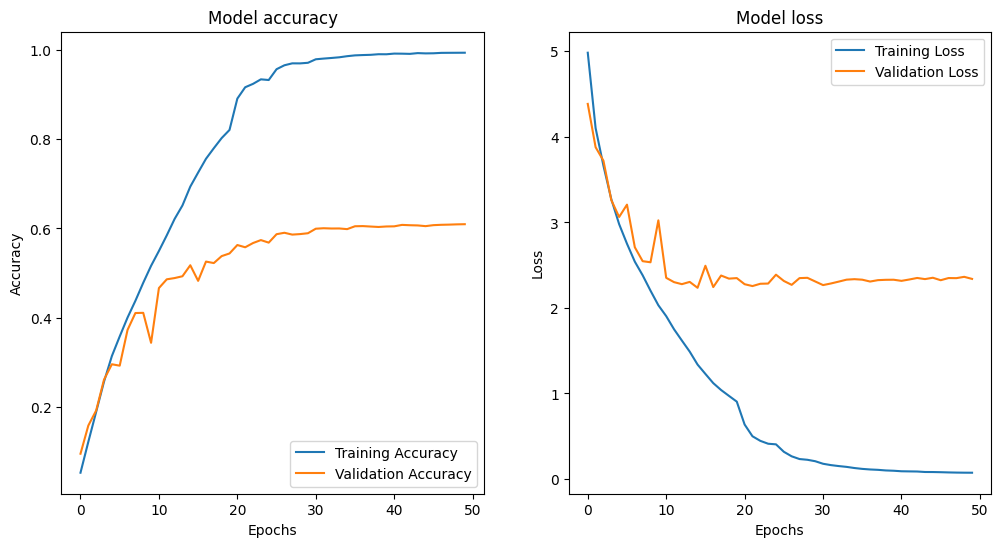

In [35]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.legend()

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


<Axes: >

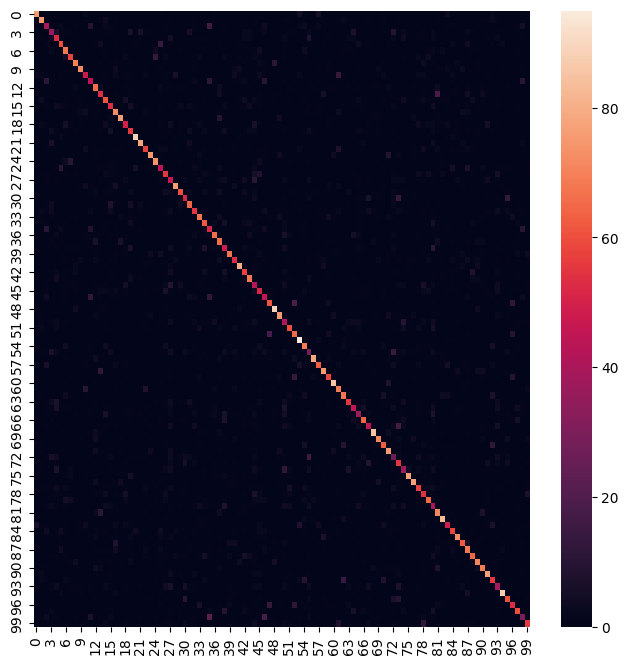

In [36]:
# Generate predictions on the test set
y_pred_probs = cnn_model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
# y_test has only one dimension, so we don't need to specify an axis for argmax.
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred) # Change is on this line, get argmax of y_test
sns.heatmap(conf_matrix, annot=False)

In [37]:
# Classification report
n_classes = 100
target_names = [f"Category {i}" for i in range(n_classes)]
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names)) # Added np.argmax(y_test, axis=1) because y_test is one-hot encoded and y_pred is not

              precision    recall  f1-score   support

  Category 0       0.83      0.76      0.79       100
  Category 1       0.71      0.75      0.73       100
  Category 2       0.40      0.39      0.40       100
  Category 3       0.40      0.36      0.38       100
  Category 4       0.44      0.52      0.47       100
  Category 5       0.59      0.60      0.59       100
  Category 6       0.57      0.68      0.62       100
  Category 7       0.70      0.58      0.63       100
  Category 8       0.73      0.70      0.71       100
  Category 9       0.84      0.72      0.77       100
 Category 10       0.59      0.47      0.53       100
 Category 11       0.50      0.44      0.47       100
 Category 12       0.54      0.66      0.59       100
 Category 13       0.51      0.53      0.52       100
 Category 14       0.54      0.61      0.57       100
 Category 15       0.51      0.53      0.52       100
 Category 16       0.60      0.72      0.65       100
 Category 17       0.81    

In [38]:
def calculate_fnr_fpr(conf_matrix):
  FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
  FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
  TP = np.diag(conf_matrix)
  TN = conf_matrix.sum() - (FP + FN + TP)

  FNR = FN / (FN + TP)
  FPR = FP / (FP + TN)
  return FNR, FPR

In [39]:
# Calculate FNR and FPR for each model
fnr_CNN, fpr_CNN = calculate_fnr_fpr(conf_matrix)

In [40]:
# Example (replace with actual class counts)
class_counts = np.bincount(np.argmax(y_test, axis=1)) # Added np.argmax to flatten the array

weighted_avg_fnr_CNN = np.average(fnr_CNN, weights=class_counts)
weighted_avg_fpr_CNN = np.average(fpr_CNN, weights=class_counts)

print("Weighted Avg FNR (CNN):", weighted_avg_fnr_CNN)
print("Weighted Avg FPR (CNN):", weighted_avg_fpr_CNN)

Weighted Avg FNR (CNN): 0.3876
Weighted Avg FPR (CNN): 0.003915151515151516


In [41]:
####################################################################### Model 2 - DenseNet #########################################################################

In [42]:
# Parameters for DenseNet
growth_rate = 24        # Controls the number of filters added per Dense Block
depth = 160             # Number of layers in the DenseNet
compression = 0.5       # Compression factor for Transition Layers
weight_decay = 1e-4     # L2 regularization
classes_num = 100       # Number of output classes (e.g., CIFAR-100)
input_shape = (32, 32, 3)  # Input image dimensions

In [43]:
# Function to build DenseNet
def densenet(img_input, classes_num):

    # Convolutional Layer function
    def conv(x, out_filters, k_size):
        return Conv2D(filters=out_filters,
                      kernel_size=k_size,
                      strides=(1,1),
                      padding='same',
                      kernel_initializer='he_normal',
                      kernel_regularizer=regularizers.l2(weight_decay),
                      use_bias=False)(x)

    # Fully connected output layer with softmax activation
    def dense_layer(x):
        return Dense(units=classes_num,
                     activation='softmax',
                     kernel_initializer='he_normal',
                     kernel_regularizer=regularizers.l2(weight_decay))(x)

    # Batch Normalization followed by ReLU Activation
    def bn_relu(x):
        x = BatchNormalization(momentum=0.9, epsilon=1e-5)(x)
        x = Activation('relu')(x)
        return x

    # Bottleneck layer with 1x1 and 3x3 convolutions
    def bottleneck(x):
        channels = growth_rate * 4
        x = bn_relu(x)
        x = conv(x, channels, (1,1))
        x = bn_relu(x)
        x = conv(x, growth_rate, (3,3))
        return x

    # Single 3x3 convolution layer
    def single(x):
        x = bn_relu(x)
        x = conv(x, growth_rate, (3,3))
        return x

    # Transition layer with compression and downsampling via Average Pooling
    def transition(x, nchannels):
        outchannels = int(nchannels * compression)
        x = bn_relu(x)
        x = conv(x, outchannels, (1,1))
        x = AveragePooling2D((2,2), strides=(2, 2))(x)
        return x, outchannels

    # Dense Block: Repeated bottleneck layers followed by concatenation
    def dense_block(x, blocks, nchannels):
        concat = x
        for i in range(blocks):
            x = bottleneck(concat)
            concat = concatenate([x, concat], axis=-1)
            nchannels += growth_rate
        return concat, nchannels

    # Calculate the number of bottleneck layers per dense block
    nblocks = (depth - 4) // 6
    nchannels = growth_rate * 2

    # Initial 3x3 convolutional layer
    x = conv(img_input, nchannels, (3,3))

    # Three dense blocks and two transition layers
    x, nchannels = dense_block(x, nblocks, nchannels)
    x, nchannels = transition(x, nchannels)
    x, nchannels = dense_block(x, nblocks, nchannels)
    x, nchannels = transition(x, nchannels)
    x, nchannels = dense_block(x, nblocks, nchannels)

    # Batch Normalization and ReLU before global pooling
    x = bn_relu(x)

    # Global Average Pooling layer
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Add dropout here for regularization
    # Output layer
    x = dense_layer(x)

    return x

In [44]:
# Define the input shape for the model to match your data
input_shape = (32, 32, 3)
img_input = Input(shape=input_shape)

# Build the DenseNet model
output = densenet(img_input, classes_num)
DenseNet_model = Model(img_input, output)

# Compile the model with Adam optimizer and categorical cross-entropy loss
DenseNet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [45]:
# Train the model
history = DenseNet_model.fit(X_train_data,                              # Input training data
                             y_train_data,                              # Corresponding training labels
                             epochs=50,                                  # Number of training epochs
                             callbacks=[rlrop],                         # learning rate reduction
                             validation_data=(X_val_data, y_val_data))  # Validation data

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 395s 215ms/step - accuracy: 0.0577 - loss: 6.1651 - val_accuracy: 0.1169 - val_loss: 4.6657 - learning_rate: 0.0010
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.1482 - loss: 4.3424 - val_accuracy: 0.2308 - val_loss: 3.6449 - learning_rate: 0.0010
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.2272 - loss: 3.5938 - val_accuracy: 0.3074 - val_loss: 3.1662 - learning_rate: 0.0010
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.2941 - loss: 3.1992 - val_accuracy: 0.3173 - val_loss: 3.1174 - learning_rate: 0.0010
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.3493 - loss: 2.9448 - val_accuracy: 0.3946 - val_loss: 2.7636 - learning_rate: 0.0010
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.3942 - loss: 2.7730 - val_accuracy: 0.4155 - val_loss: 2.7291 - learning_rate: 0.0010
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.4276 -

In [46]:
# Access training accuracy
train_accuracy = history.history['accuracy'][-1] # Use 'acc' as the key
print("Final Training Accuracy: {:.2f}%".format(train_accuracy * 100))

# Access validation accuracy
val_accuracy = history.history['val_accuracy'][-1] # Use 'val_acc' as the key
print("Final Validation Accuracy: {:.2f}%".format(val_accuracy * 100))

Final Training Accuracy: 99.74%
Final Validation Accuracy: 64.58%


In [47]:
# Calculate test accuracy
y_pred = DenseNet_model.predict(X_test) # Predict labels for test data
y_pred = np.argmax(y_pred, axis=1) # Get the class with highest probability

# Check if y_test is 1D or 2D
if y_test.ndim == 1:
  test_accuracy = accuracy_score(y_test, y_pred)
else:
  test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)

print('Test Accuracy: ', round((test_accuracy * 100), 2), "%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 54ms/step
Test Accuracy:  64.66 %


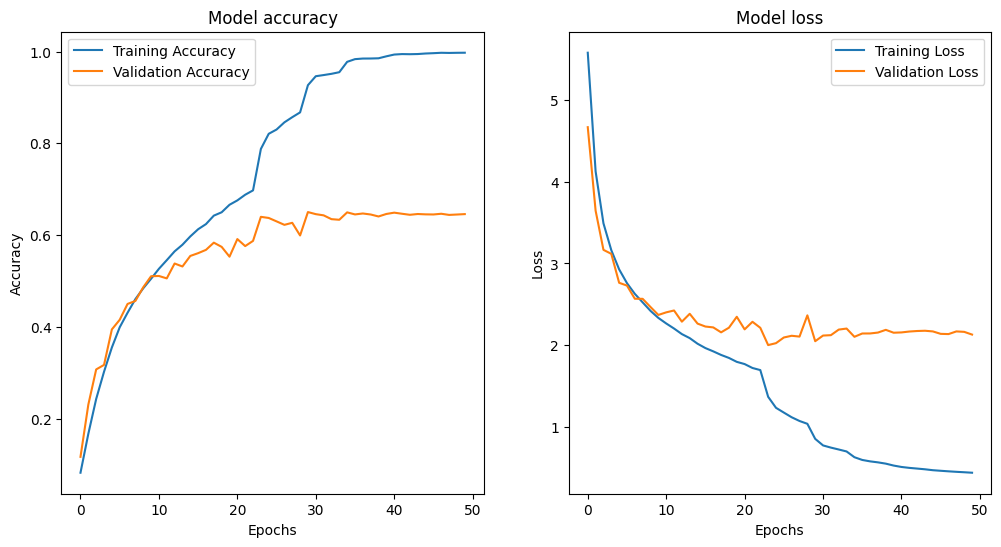

In [48]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.legend()

plt.show()

<Axes: >

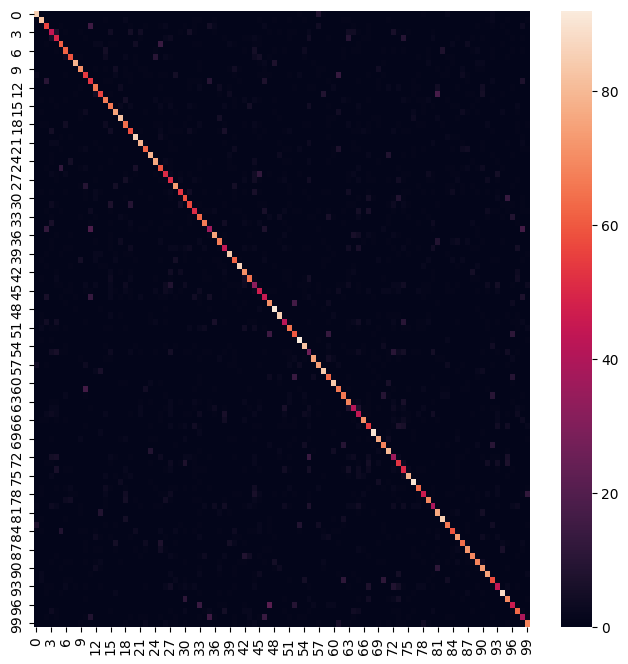

In [49]:
# Confusion matrix
# Check if y_test is 1D or 2D
if y_test.ndim == 1:
  conf_matrix = confusion_matrix(y_test, y_pred)
else:
  conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
sns.heatmap(conf_matrix, annot=False)

In [50]:
# Classification report
# Determine the unique classes present in y_pred
unique_classes = len(np.unique(y_pred))
target_names = [f"Category {i}" for i in range(unique_classes)]

# Check if y_test is 1D, if so, reshape it to 2D
if y_test.ndim == 1:
  y_test = y_test.reshape(-1, 1)

print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Category 0       0.86      0.85      0.85       100
  Category 1       0.80      0.82      0.81       100
  Category 2       0.55      0.56      0.55       100
  Category 3       0.43      0.44      0.43       100
  Category 4       0.48      0.49      0.48       100
  Category 5       0.67      0.61      0.64       100
  Category 6       0.66      0.62      0.64       100
  Category 7       0.74      0.59      0.66       100
  Category 8       0.93      0.79      0.85       100
  Category 9       0.77      0.71      0.74       100
 Category 10       0.51      0.54      0.53       100
 Category 11       0.46      0.53      0.50       100
 Category 12       0.67      0.66      0.67       100
 Category 13       0.64      0.56      0.60       100
 Category 14       0.69      0.67      0.68       100
 Category 15       0.58      0.66      0.62       100
 Category 16       0.73      0.75      0.74       100
 Category 17       0.81    

In [51]:
# Calculate FNR and FPR for each model
fnr_DenseNet, fpr_DenseNet = calculate_fnr_fpr(conf_matrix)

In [52]:
# Example (replace with actual class counts)
class_counts = np.bincount(np.argmax(y_test, axis=1))

# Calculate weighted average FNR and FPR for DenseNet
weighted_avg_fnr_DenseNet = np.average(fnr_DenseNet, weights=class_counts, axis=0) # Added axis argument
weighted_avg_fpr_DenseNet = np.average(fpr_DenseNet, weights=class_counts, axis=0) # Added axis argument


print("Weighted Avg FNR (DenseNet):", weighted_avg_fnr_DenseNet)
print("Weighted Avg FPR (DenseNet):", weighted_avg_fpr_DenseNet)

Weighted Avg FNR (DenseNet): 0.3534
Weighted Avg FPR (DenseNet): 0.00356969696969697


In [53]:
####################################################################### Model 3 - EfficientNetB0 #########################################################################

In [54]:
# Resize images to (224, 224, 3) as required by EfficientNetB0
height, width, channels = 224, 224, 3
input_shape = (height, width, channels)

# Hyperparameters for the model
batch_size = 8

In [55]:
# Custom data generator class to handle image loading, preprocessing, and augmentation
class DataGenerator(keras.utils.Sequence):
    def __init__(self, images, labels=None, mode='fit', batch_size=batch_size, dim=(height, width),
                 channels=channels, n_classes=n_classes, shuffle=True, augment=False):
        self.images = images
        self.labels = labels
        self.mode = mode
        self.batch_size = batch_size
        self.dim = dim
        self.channels = channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.augment = augment
        self.on_epoch_end()  # Initialize indexes

    # Called at the end of every epoch to shuffle the dataset if required
    def on_epoch_end(self):
        self.indexes = np.arange(self.images.shape[0])
        if self.shuffle:
            np.random.shuffle(self.indexes)

    # Return the number of steps (batches) per epoch
    def __len__(self):
        return int(np.floor(len(self.images) / self.batch_size))

    # Generate one batch of data
    def __getitem__(self, index):
        # Generate indexes for the current batch
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        # Initialize batch data arrays
        X = np.empty((self.batch_size, *self.dim, self.channels))

        # Process each image in the batch
        for i, ID in enumerate(batch_indexes):
            img = self.images[ID]
            img = img.astype(np.float32) / 255.  # Normalize pixel values
            img = resize_img(img, self.dim)  # Resize image to target dimensions
            X[i] = img

        # If in 'fit' mode, return images and corresponding labels
        if self.mode == 'fit':
            y = self.labels[batch_indexes]
            if self.augment:
                X = self.__augment_batch(X)  # Apply data augmentation
            return X, y
        elif self.mode == 'predict':
            return X
        else:
            raise AttributeError("The mode should be 'fit' or 'predict'.")

    # Apply augmentation to a single image using albumentations
    def __random_transform(self, img):
        composition = albu.Compose([
            albu.HorizontalFlip(p=0.5),
            albu.VerticalFlip(p=0.5),
            albu.GridDistortion(p=0.2),
            albu.ElasticTransform(p=0.2)
        ])
        return composition(image=img)['image']

    # Apply augmentation to a batch of images
    def __augment_batch(self, img_batch):
        for i in range(img_batch.shape[0]):
            img_batch[i] = self.__random_transform(img_batch[i])
        return img_batch

In [56]:
# Create training and validation data generators with augmentation for training
train_data_generator = DataGenerator(X_train_data, y_train_data, augment=True)
valid_data_generator = DataGenerator(X_val_data, y_val_data, augment=False)

In [57]:
# Define the input shape for the model
input_shape = (224, 224, 3)  # Images with size 224x224 and 3 channels (RGB)
n_classes = 100  # Number of classes in the dataset

# Load the pre-trained EfficientNetB0 model without the top layer
efnb0 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [58]:
# Define a Sequential model and add the EfficientNet base
EfficientNetB0_model = Sequential()
EfficientNetB0_model.add(efnb0)                                    # EfficientNetB0 base model
EfficientNetB0_model.add(GlobalAveragePooling2D())                 # Global Average Pooling layer to reduce dimensionality
EfficientNetB0_model.add(Dropout(0.3))                             # Dropout layer
EfficientNetB0_model.add(Dense(n_classes, activation='sigmoid'))   # output layer with 'sigmoid' activation for multi-class classification

# Build the model to define the input shape
EfficientNetB0_model.build(input_shape=(None, 224, 224, 3))

# Print model summary
EfficientNetB0_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │         128,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,177,671 (15.94 MB)

 Trainable params: 4,135,648 (15.78 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [59]:
# Define the optimizer
optimizer = Adam(learning_rate=0.0001)

# Compile the model with categorical cross-entropy and accuracy metrics
EfficientNetB0_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
# Train the model
model_history = EfficientNetB0_model.fit(train_data_generator,                    # Training data generator
                                          validation_data=valid_data_generator,   # Validation data generator
                                          callbacks=[rlrop],                      # learning rate reduction
                                          verbose=1,                              # Print detailed progress of the training process
                                          epochs=15                               # Set number of epochs
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 268s 52ms/step - accuracy: 0.2292 - loss: 3.3553 - val_accuracy: 0.6562 - val_loss: 1.1819 - learning_rate: 1.0000e-04
Epoch 2/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 187s 50ms/step - accuracy: 0.5704 - loss: 1.5612 - val_accuracy: 0.7311 - val_loss: 0.9135 - learning_rate: 1.0000e-04
Epoch 3/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 188s 50ms/step - accuracy: 0.6540 - loss: 1.2118 - val_accuracy: 0.7466 - val_loss: 0.8887 - learning_rate: 1.0000e-04
Epoch 4/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 187s 50ms/step - accuracy: 0.7102 - loss: 0.9932 - val_accuracy: 0.7369 - val_loss: 0.9642 - learning_rate: 1.0000e-04
Epoch 5/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 188s 50ms/step - accuracy: 0.7399 - loss: 0.8796 - val_accuracy: 0.7760 - val_loss: 0.8424 - learning_rate: 1.0000e-04
Epoch 6/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 188s 50ms/step - accuracy: 0.7759 - loss: 0.7555 - val_accuracy: 0.7799 - val_loss: 0.8727 - learning_rate: 1.0000e-04
Epoch 7/15
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 190

In [61]:
# Access training accuracy
train_accuracy = model_history.history['accuracy'][-1] # Use 'acc' as the key
print("Final Training Accuracy: {:.2f}%".format(train_accuracy * 100))

# Access validation accuracy
val_accuracy = model_history.history['val_accuracy'][-1] # Use 'val_acc' as the key
print("Final Validation Accuracy: {:.2f}%".format(val_accuracy * 100))

Final Training Accuracy: 91.46%
Final Validation Accuracy: 80.27%


In [62]:
# Predict on test data (resize test data if necessary)
y_pred = EfficientNetB0_model.predict(DataGenerator(X_test, mode='predict', augment=False, shuffle=False), verbose=1)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Calculate test accuracy
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print(f'Test Accuracy: {round(test_accuracy * 100, 2)}%')

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step
Test Accuracy: 80.52%


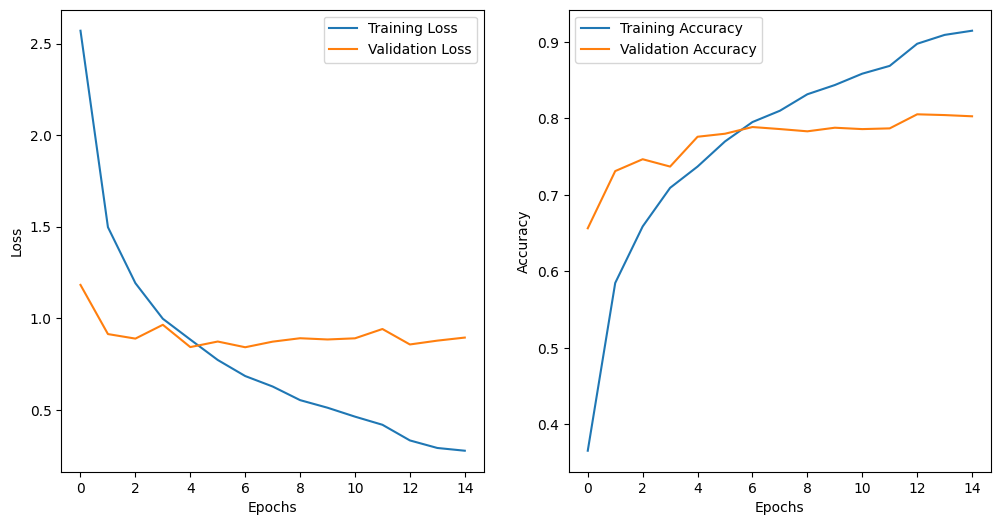

In [63]:
# Plot training loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['loss'], label='Training Loss')  # Use model_history instead of history
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

<Axes: >

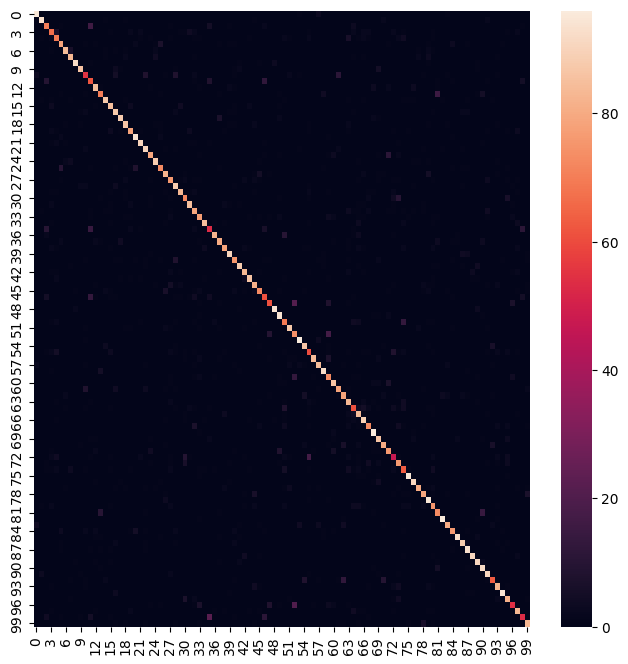

In [64]:
# Confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
sns.heatmap(conf_matrix, annot=False)

In [65]:
# Evaluate predictions
print("Test Accuracy (after evaluation):", accuracy_score(np.argmax(y_test, axis=1), y_pred))
print(classification_report(np.argmax(y_test, axis=1), y_pred))

Test Accuracy (after evaluation): 0.8052
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       100
           1       0.93      0.93      0.93       100
           2       0.68      0.70      0.69       100
           3       0.70      0.67      0.68       100
           4       0.70      0.69      0.70       100
           5       0.77      0.78      0.78       100
           6       0.90      0.84      0.87       100
           7       0.84      0.83      0.83       100
           8       0.96      0.92      0.94       100
           9       0.92      0.86      0.89       100
          10       0.68      0.55      0.61       100
          11       0.53      0.62      0.57       100
          12       0.85      0.85      0.85       100
          13       0.77      0.70      0.73       100
          14       0.89      0.87      0.88       100
          15       0.80      0.85      0.83       100
          16       0.77      0.87      0

In [66]:
# Calculate FNR and FPR for each model
fnr_EfficientNetB0, fpr_EfficientNetB0 = calculate_fnr_fpr(conf_matrix)

In [67]:
# Calculate FNR and FPR for each model
fnr_EfficientNetB0, fpr_EfficientNetB0 = calculate_fnr_fpr(conf_matrix)

# Example (replace with actual class counts)
# class_counts = np.bincount(np.argmax(y_test, axis=1))
# The above line may cause issues if y_test contains only 1 class
# Use the line below to ensure class_counts has the correct shape
class_counts = np.array([np.bincount(np.argmax(y_test, axis=1))])

# Remove the extra dimension from class_counts using flatten()
weighted_avg_fnr_EfficientNetB0 = np.average(fnr_EfficientNetB0, weights=class_counts.flatten(), axis=0) # Added axis=0
weighted_avg_fpr_EfficientNetB0 = np.average(fpr_EfficientNetB0, weights=class_counts.flatten(), axis=0) # Added axis=0

print("Weighted Avg FNR (EfficientNetB0):", weighted_avg_fnr_EfficientNetB0)
print("Weighted Avg FPR (EfficientNetB0):", weighted_avg_fpr_EfficientNetB0)

Weighted Avg FNR (EfficientNetB0): 0.1948
Weighted Avg FPR (EfficientNetB0): 0.0019676767676767674


In [68]:
################################################################## Majority Voting - Basic Implementation ####################################################################

In [69]:
# Resize images in X_test to match the expected input shape of EfficientNetB0_model
X_test_resized = tf.image.resize(X_test, [224, 224])

In [71]:
# Get predictions from each model
cnn_predictions = cnn_model.predict(X_test)
densenet_predictions = DenseNet_model.predict(X_test)
efficientnet_predictions = EfficientNetB0_model.predict(X_test_resized)

# Convert predictions to class labels (get the index of the class with the highest probability)
cnn_predictions = np.argmax(cnn_predictions, axis=1)
densenet_predictions = np.argmax(densenet_predictions, axis=1)
efficientnet_predictions = np.argmax(efficientnet_predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step


In [72]:
# Stack predictions and apply majority voting
stacked_predictions = np.stack([cnn_predictions, densenet_predictions, efficientnet_predictions], axis=1)

# Apply majority voting by finding the most frequent class prediction across models for each instance
final_predictions_majority = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=stacked_predictions)

In [73]:
# Ensure that y_test is not one-hot encoded; if it is, convert it to class indices.
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Evaluate the majority vote classifier
accuracy_majority = accuracy_score(y_test, final_predictions_majority)
print("Majority Voting Accuracy: {:.2f}%".format(accuracy_majority * 100))

Majority Voting Accuracy: 52.09%


<Axes: >

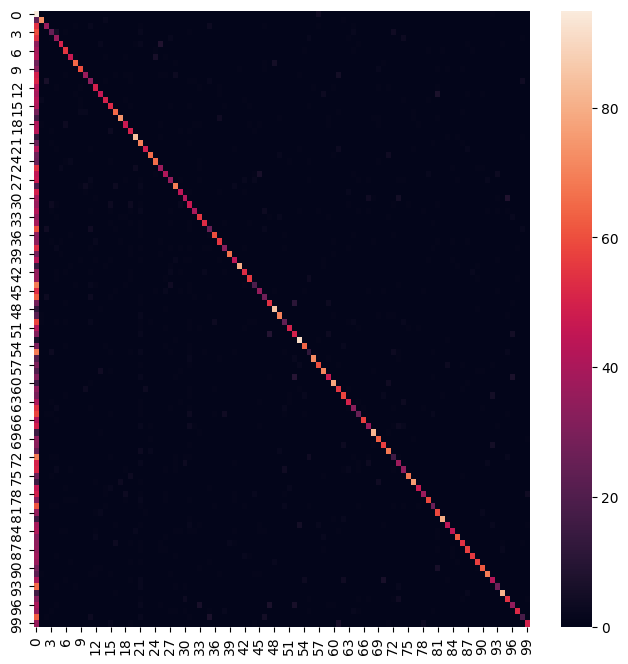

In [74]:
# Confusion matrix for the majority voting results
conf_matrix_majority = confusion_matrix(y_test, final_predictions_majority)
sns.heatmap(conf_matrix_majority, annot=False, fmt="d")

In [75]:
# Print classification report
print(classification_report(y_test, final_predictions_majority))

              precision    recall  f1-score   support

           0       0.02      0.95      0.05       100
           1       0.92      0.73      0.82       100
           2       0.71      0.36      0.48       100
           3       0.60      0.25      0.35       100
           4       0.60      0.36      0.45       100
           5       0.91      0.50      0.65       100
           6       0.77      0.55      0.64       100
           7       0.87      0.47      0.61       100
           8       0.92      0.65      0.76       100
           9       0.90      0.60      0.72       100
          10       0.80      0.36      0.50       100
          11       0.56      0.33      0.42       100
          12       0.79      0.49      0.60       100
          13       0.81      0.46      0.59       100
          14       0.85      0.50      0.63       100
          15       0.72      0.52      0.60       100
          16       0.86      0.65      0.74       100
          17       0.94    

In [76]:
# Calculate False Negative Rate (FNR) and False Positive Rate (FPR) for the majority voting predictions
fnr_majority, fpr_majority = calculate_fnr_fpr(conf_matrix_majority)

# Calculate weighted average FNR and FPR based on class counts
class_counts = np.bincount(y_test)
weighted_avg_fnr_majority = np.average(fnr_majority, weights=class_counts)
weighted_avg_fpr_majority = np.average(fpr_majority, weights=class_counts)

print("Weighted Avg FNR (Majority Voting):", weighted_avg_fnr_majority)
print("Weighted Avg FPR (Majority Voting):", weighted_avg_fpr_majority)

Weighted Avg FNR (Majority Voting): 0.4791
Weighted Avg FPR (Majority Voting): 0.004839393939393941


In [77]:
############################################################# Majority Voting - Weighted Voting (Equal Weights) ###############################################################

In [88]:
# Define the weights for each model
weights_equal = [0.33333, 0.33333, 0.33333]  # Assuming EfficientNet gets the highest weight

# Get predictions from each model
cnn_predictions = cnn_model.predict(X_test)
densenet_predictions = DenseNet_model.predict(X_test)
efficientnet_predictions = EfficientNetB0_model.predict(X_test_resized)

# Compute weighted average of probabilities
final_probabilities_equal = (weights_equal[0] * cnn_predictions +
                             weights_equal[1] * densenet_predictions +
                             weights_equal[2] * efficientnet_predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [89]:
# Choose the class with the highest probability
final_predictions_equal = np.argmax(final_probabilities_equal, axis=1)

# Evaluate the weighted voting classifier with equal weights
accuracy_equal = accuracy_score(y_test, final_predictions_equal)
print("Weighted Voting (Equal) Accuracy: {:.2f}%".format(accuracy_equal * 100))

Weighted Voting (Equal) Accuracy: 67.06%


<Axes: >

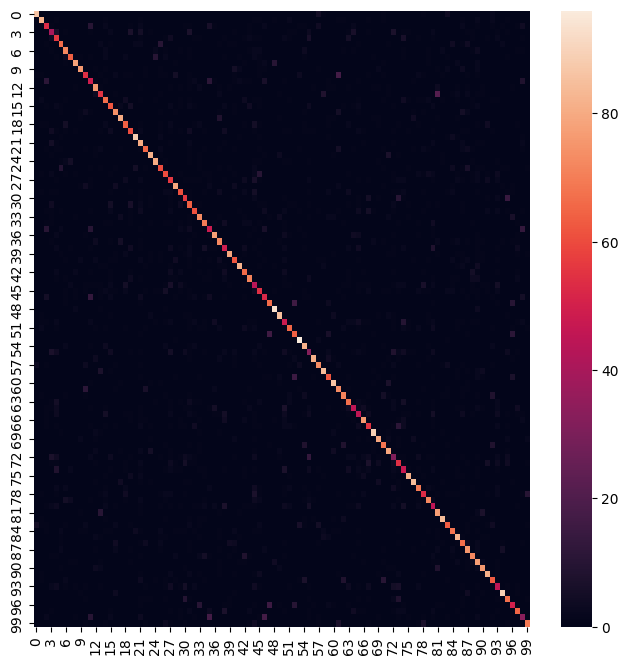

In [90]:
# Confusion matrix for weighted voting results with equal weights
conf_matrix_equal = confusion_matrix(y_test, final_predictions_equal)
sns.heatmap(conf_matrix_equal, annot=False, fmt="d")

In [91]:
# Print classification report
print(classification_report(y_test, final_predictions_equal))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       100
           1       0.83      0.82      0.82       100
           2       0.55      0.53      0.54       100
           3       0.45      0.40      0.42       100
           4       0.47      0.56      0.51       100
           5       0.72      0.66      0.69       100
           6       0.68      0.72      0.70       100
           7       0.82      0.64      0.72       100
           8       0.85      0.78      0.81       100
           9       0.87      0.76      0.81       100
          10       0.63      0.54      0.58       100
          11       0.44      0.49      0.46       100
          12       0.72      0.76      0.74       100
          13       0.60      0.55      0.57       100
          14       0.65      0.67      0.66       100
          15       0.61      0.62      0.62       100
          16       0.74      0.74      0.74       100
          17       0.82    

In [92]:
# Calculate FNR and FPR for the weighted voting predictions (equal weights)
fnr_equal, fpr_equal = calculate_fnr_fpr(conf_matrix_equal)

# Calculate weighted average FNR and FPR based on class counts
weighted_avg_fnr_equal = np.average(fnr_equal, weights=class_counts)
weighted_avg_fpr_equal = np.average(fpr_equal, weights=class_counts)

print("Weighted Avg FNR (Equal Weights):", weighted_avg_fnr_equal)
print("Weighted Avg FPR (Equal Weights):", weighted_avg_fpr_equal)

Weighted Avg FNR (Equal Weights): 0.3294
Weighted Avg FPR (Equal Weights): 0.0033272727272727265


In [93]:
########################################################### Majority Voting - Weighted Voting (Different Weights) #############################################################

In [94]:
# Define different weights for each model (giving more weight to EfficientNet)
weights_different = [0.25, 0.25, 0.50]

# Get predictions from each model
cnn_predictions = cnn_model.predict(X_test)
densenet_predictions = DenseNet_model.predict(X_test)
efficientnet_predictions = EfficientNetB0_model.predict(X_test_resized)

# Compute weighted average of probabilities with different weights
final_probabilities_different = (weights_different[0] * cnn_predictions +
                                 weights_different[1] * densenet_predictions +
                                 weights_different[2] * efficientnet_predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [95]:
# Choose the class with the highest probability
final_predictions_different = np.argmax(final_probabilities_different, axis=1)

# Evaluate the weighted voting classifier with different weights
accuracy_different = accuracy_score(y_test, final_predictions_different)
print("Weighted Voting (Different) Accuracy: {:.2f}%".format(accuracy_different * 100))

Weighted Voting (Different) Accuracy: 62.23%


<Axes: >

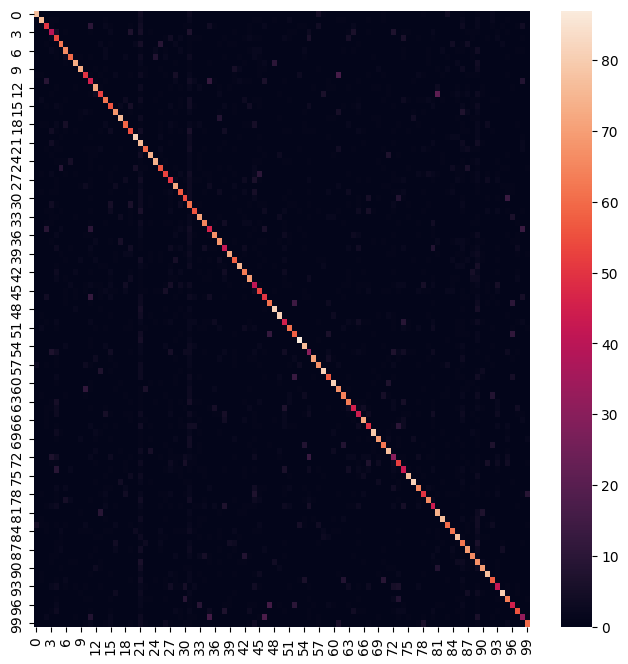

In [96]:
# Confusion matrix for weighted voting results with different weights
conf_matrix_different = confusion_matrix(y_test, final_predictions_different)
sns.heatmap(conf_matrix_different, annot=False, fmt="d")

In [97]:
# Print classification report
print(classification_report(y_test, final_predictions_different))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82       100
           1       0.83      0.76      0.79       100
           2       0.56      0.50      0.53       100
           3       0.44      0.40      0.42       100
           4       0.36      0.54      0.43       100
           5       0.70      0.62      0.66       100
           6       0.67      0.66      0.66       100
           7       0.82      0.60      0.69       100
           8       0.84      0.73      0.78       100
           9       0.87      0.73      0.79       100
          10       0.62      0.50      0.56       100
          11       0.35      0.45      0.39       100
          12       0.72      0.72      0.72       100
          13       0.60      0.52      0.56       100
          14       0.64      0.62      0.63       100
          15       0.53      0.56      0.55       100
          16       0.74      0.68      0.71       100
          17       0.82    

In [98]:
# Calculate FNR and FPR for the weighted voting predictions (different weights)
fnr_different, fpr_different = calculate_fnr_fpr(conf_matrix_different)

# Calculate weighted average FNR and FPR based on class counts
weighted_avg_fnr_different = np.average(fnr_different, weights=class_counts)
weighted_avg_fpr_different = np.average(fpr_different, weights=class_counts)

print("Weighted Avg FNR (Different Weights):", weighted_avg_fnr_different)
print("Weighted Avg FPR (Different Weights):", weighted_avg_fpr_different)

Weighted Avg FNR (Different Weights): 0.3777
Weighted Avg FPR (Different Weights): 0.003815151515151514
